<a href="https://colab.research.google.com/github/nislambd/Basic-Object-Detection-YoloV8/blob/main/YOLOV8_Detect_Object.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple way to detect object using YOLO V8

## Connect to Google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sys
FOLDER_PATH = '/content/drive/MyDrive/Yolo/Detect Object'
sys.path.append(FOLDER_PATH)

## Install/import the required libraries

In [ ]:
!pip install ultralytics

In [4]:
import torch
import torchvision
from ultralytics import YOLO

In [5]:
print(torch.__version__)
print(torchvision.__version__)

2.3.0+cu121
0.18.0+cu121


## Create the model

In [6]:
model = YOLO("yolov8m.pt")

100%|██████████| 49.7M/49.7M [00:00<00:00, 303MB/s]


## Predict an image

In [7]:
import os
img = os.path.join(FOLDER_PATH, 'cat_dog.jpg')
print(img)

/content/drive/MyDrive/Yolo/Detect Object/cat_dog.jpg


In [9]:
results = model.predict(img)


image 1/1 /content/drive/MyDrive/Yolo/Detect Object/cat_dog.jpg: 448x640 1 cat, 1 dog, 1817.5ms
Speed: 15.4ms preprocess, 1817.5ms inference, 29.8ms postprocess per image at shape (1, 3, 448, 640)


## Display the results

In [ ]:
#As we provided only a single image, it returns an array with a single item
result = results[0]

In [ ]:
len(result.boxes)

2

In [ ]:
box = result.boxes[0]
print("Object type:", box.cls)
print("Coordinates:", box.xyxy)
print("Probability:", box.conf)

Object type: tensor([16.])
Coordinates: tensor([[261.0996,  94.0881, 460.9550, 313.6855]])
Probability: tensor([0.9450])


In [ ]:
print("Object type:",box.cls[0])
print("Coordinates:",box.xyxy[0])
print("Probability:",box.conf[0])

Object type: tensor(16.)
Coordinates: tensor([261.0996,  94.0881, 460.9550, 313.6855])
Probability: tensor(0.9450)


In [ ]:
cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

Object type: 16.0
Coordinates: [261.099609375, 94.0881118774414, 460.95501708984375, 313.685546875]
Probability: 0.9449875354766846


In [ ]:
print(result.names)

{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw

In [ ]:
cords = box.xyxy[0].tolist()
cords = [round(x) for x in cords]
class_id = result.names[box.cls[0].item()]
conf = round(box.conf[0].item(), 2)
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

Object type: dog
Coordinates: [261, 94, 461, 314]
Probability: 0.94


In [ ]:
for box in result.boxes:
  class_id = result.names[box.cls[0].item()]
  cords = box.xyxy[0].tolist()
  cords = [round(x) for x in cords]
  conf = round(box.conf[0].item(), 2)
  print("Object type:", class_id)
  print("Coordinates:", cords)
  print("Probability:", conf)
  print("---")

Object type: dog
Coordinates: [261, 94, 461, 314]
Probability: 0.94
---
Object type: cat
Coordinates: [140, 170, 256, 315]
Probability: 0.91
---


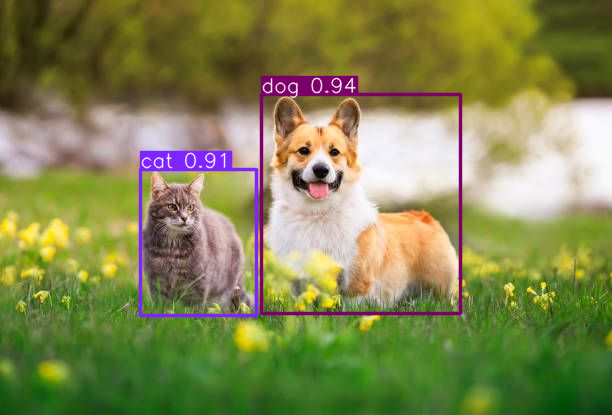

In [ ]:
from PIL import Image
Image.fromarray(result.plot()[:,:,::-1])